In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## The Data

We will use a data frame with 777 observations on the following 18 variables.
* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate`

In [39]:
college = pd.read_csv('College_Data')

In [4]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
Unnamed: 0     777 non-null object
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(2)
memory usage: 109.3+ KB


In [5]:
college.head(2)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


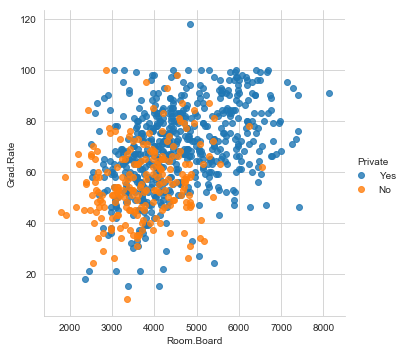

In [11]:
sns.set_style('whitegrid')
sns.lmplot(x='Room.Board', y='Grad.Rate', data=college, hue='Private',fit_reg=False)

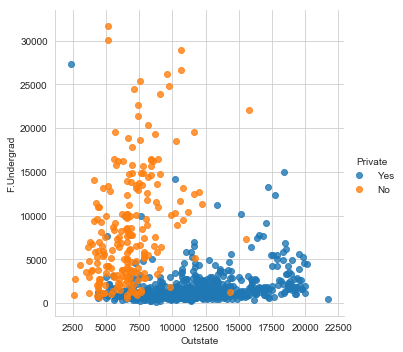

In [13]:
sns.set_style('whitegrid')
sns.lmplot(x='Outstate', y='F.Undergrad', data=college, hue='Private',fit_reg=False)

Text(0.5, 0, 'Outstate')

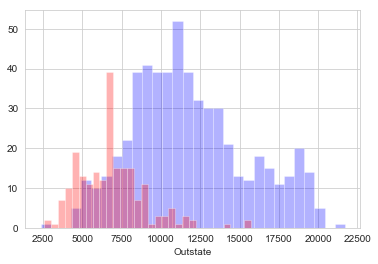

In [19]:
college[college['Private']=='Yes']['Outstate'].hist(color='blue', alpha=0.3, bins=30)
college[college['Private']!='Yes']['Outstate'].hist(color='red', alpha=0.3, bins=30)
plt.xlabel('Outstate')

Text(0.5, 0, 'Grad.Rate')

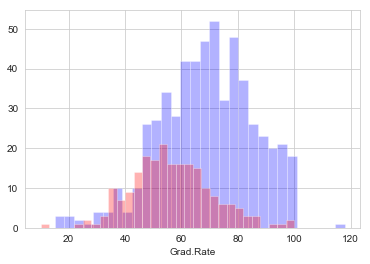

In [22]:
college[college['Private']=='Yes']['Grad.Rate'].hist(color='blue', alpha=0.3, bins=30)
college[college['Private']!='Yes']['Grad.Rate'].hist(color='red', alpha=0.3, bins=30)
plt.xlabel('Grad.Rate')

In [24]:
college[college['Grad.Rate'] > 100 ]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [40]:
college['Grad.Rate'].iloc[95] = 100

c:\users\steven\envs\pml\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [30]:
college[college['Grad.Rate'] > 100 ]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


Text(0.5, 0, 'Grad.Rate')

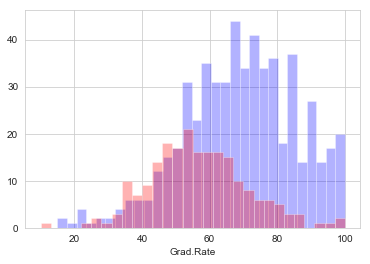

In [31]:
college[college['Private']=='Yes']['Grad.Rate'].hist(color='blue', alpha=0.3, bins=30)
college[college['Private']!='Yes']['Grad.Rate'].hist(color='red', alpha=0.3, bins=30)
plt.xlabel('Grad.Rate')

In [32]:
from sklearn.cluster import KMeans

In [34]:
k_means = KMeans(n_clusters=2)

In [46]:
k_means.fit(college.iloc[:,2:])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [48]:
k_means.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

In [49]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [50]:
college['cluster'] = college['Private'].apply(converter)

In [54]:
college.head(2)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,cluster
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1


In [57]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(college['cluster'],kmeans.labels_))
print(classification_report(college['cluster'],kmeans.labels_))

NameError: name 'kmeans' is not defined